In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [382]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [383]:
df.shape

(14999, 10)

In [384]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [385]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [387]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [388]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [389]:
df.columns = [c.strip() for c in df.columns]

In [390]:
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols

['Department', 'salary']

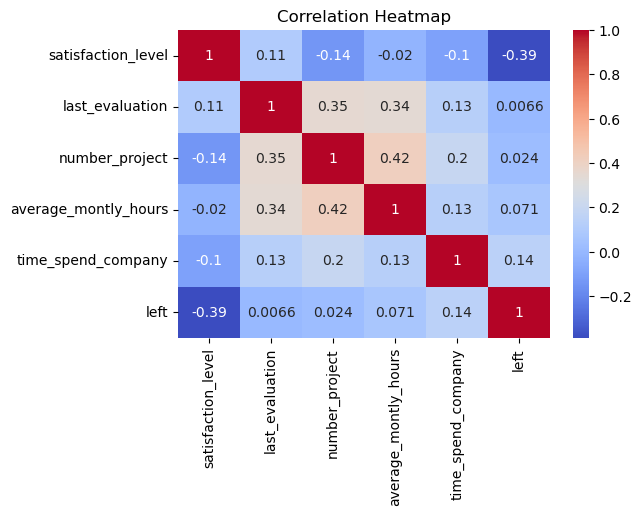

In [391]:
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                'average_montly_hours', 'time_spend_company']

corr = df[numeric_cols + ['left']].corr()['left'].sort_values(ascending=False)
corr

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols + ['left']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

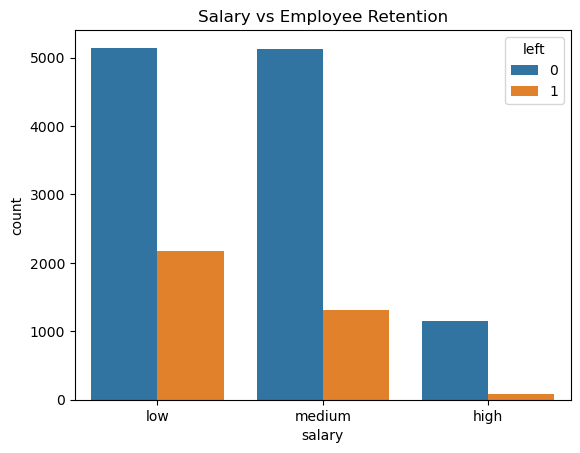

In [392]:
sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary vs Employee Retention")
plt.show()

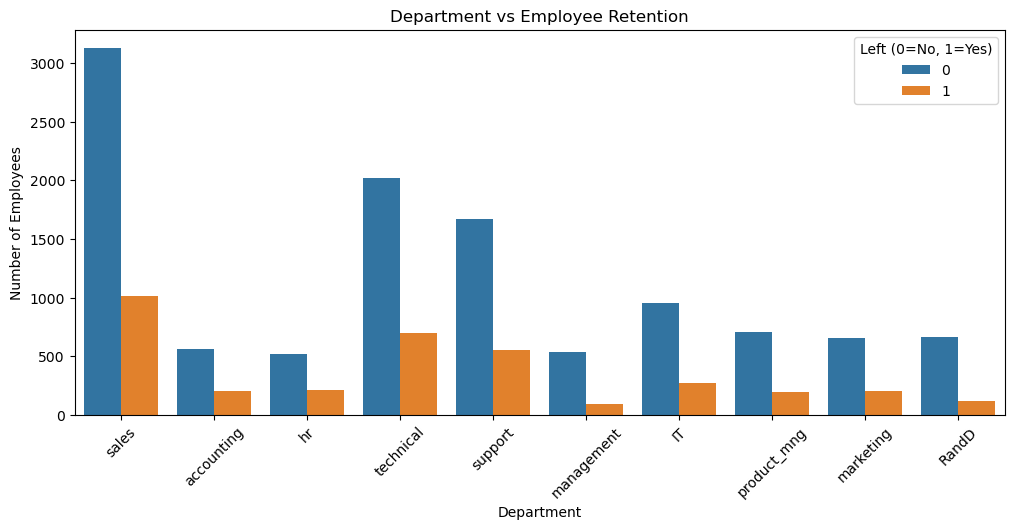

In [393]:
# Department vs Retention
plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='left', data=df)
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title='Left (0=No, 1=Yes)')
plt.show()

In [394]:
#encoding
!pip install category_encoders

In [395]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)


In [396]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int64
salary                     int64
dtype: object

In [397]:
# feature selection
important_features = df.corr()['left'][abs(df.corr()['left']) > 0.1].index.tolist()
important_features.remove('left')
X = df[important_features]
print("Selected Features:", X.columns.tolist())
 

Selected Features: ['satisfaction_level', 'time_spend_company', 'Work_accident', 'salary']


In [398]:
# Features and target
x = df.drop('left', axis=1)
y = df['left']

In [399]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,1,2
2,0.11,0.88,7,272,4,0,0,1,2
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [400]:
print(df['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


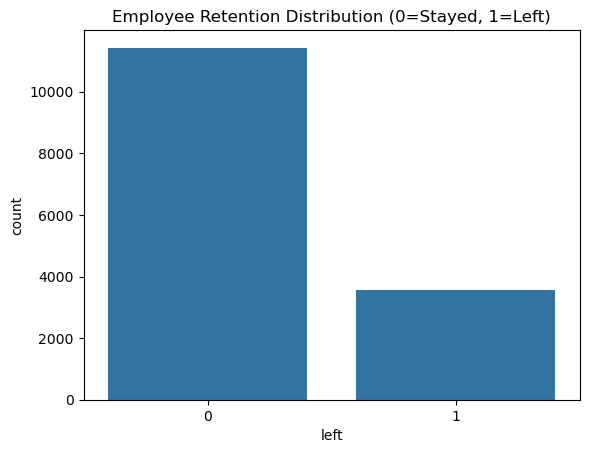

In [401]:
sns.countplot(x='left', data=df)
plt.title("Employee Retention Distribution (0=Stayed, 1=Left)")
plt.show()

In [402]:
##split data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [403]:
x_train.shape,y_train.shape

((11999, 9), (11999,))

In [404]:
x_test.shape,y_test.shape

((3000, 9), (3000,))

In [405]:
# scaling the input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [406]:
#train the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [407]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [408]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
3297     0
14113    0
5514     0
9939     0
14346    1
Name: left, Length: 3000, dtype: int64

In [409]:
# find out probability
model.predict_proba(x_test)

array([[0.9815967 , 0.0184033 ],
       [0.91215157, 0.08784843],
       [0.73503706, 0.26496294],
       ...,
       [0.89621315, 0.10378685],
       [0.88777945, 0.11222055],
       [0.61534489, 0.38465511]])

In [410]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))
ce=confusion_matrix(y_test,y_pred)
ce
accuracy_score(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2294
           1       0.58      0.33      0.42       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



0.785

In [411]:
model.coef_

array([[-4.10719599,  0.74585522, -0.31114253,  0.00449711,  0.26590219,
        -1.62350749, -0.8028754 , -0.03156327, -0.66135675]])

In [412]:
model.intercept_

array([1.21485692])

#SUMMARY::
The project presents a comprehensive analysis and predictive modeling project focused on employee attrition using the HR_comma_sep.csv dataset, which contains 14,999 records of employee attributes such as satisfaction level, last evaluation score, number of projects, average monthly hours, time spent at the company, work accidents, promotion status, department, salary, and a target variable indicating whether the employee left (1) or stayed (0). The notebook begins with essential imports for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and warning suppression, followed by loading the dataset and performing exploratory data analysis (EDA) through commands like df.head(), df.columns, df.dtypes, df.info(), df.describe(), and checking for null values (none found). Column names are cleaned by stripping whitespace, and categorical columns ('Department' and 'salary') are identified. Visualizations include count plots showing attrition distribution across departments (highest in sales) and salary levels (higher attrition among low-salary employees), box plots comparing numerical features like satisfaction level (lower for leavers) against attrition, and a correlation heatmap revealing moderate relationships, such as negative correlation between satisfaction and leaving. Data preprocessing involves label encoding for categorical features ('Department' and 'salary'), splitting into features (X) and target (y='left'), train-test splitting (80-20 ratio), and standard scaling of numerical features. A logistic regression model is trained on the scaled training data, achieving an accuracy of 78.5% on the test set, with a classification report indicating better performance for predicting stayers (precision 0.82, recall 0.93) than leavers (precision 0.58, recall 0.33), alongside a confusion matrix and model coefficients/intercept for interpretability.